In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [20]:
file_path = r'C:\Users\Sumit\Desktop\PROJECT\dataset\country_wise_latest.csv' 
data = pd.read_csv(file_path)
print('Dataset Loaded Successfully!')
print('Shape:', data.shape)
data.head()

Dataset Loaded Successfully!
Shape: (187, 15)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [21]:
print('\nDataset Info:')
print(data.info())
print('\nMissing Values:')
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187

In [23]:
print('\nSummary Statistics:')
print(data.describe())


Summary Statistics:
          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173

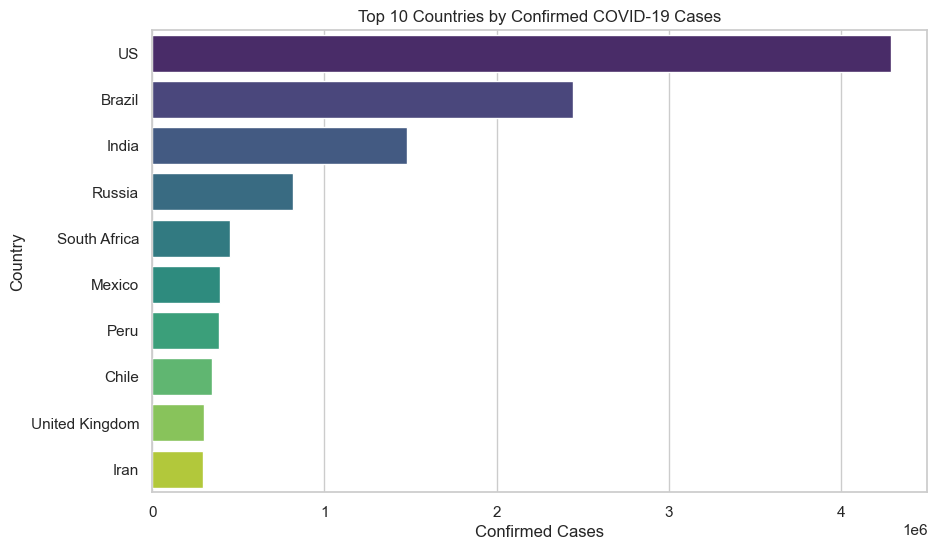

In [29]:
top_confirmed = data.sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y='Country/Region', hue='Country/Region', data=top_confirmed, palette='viridis', legend=False)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

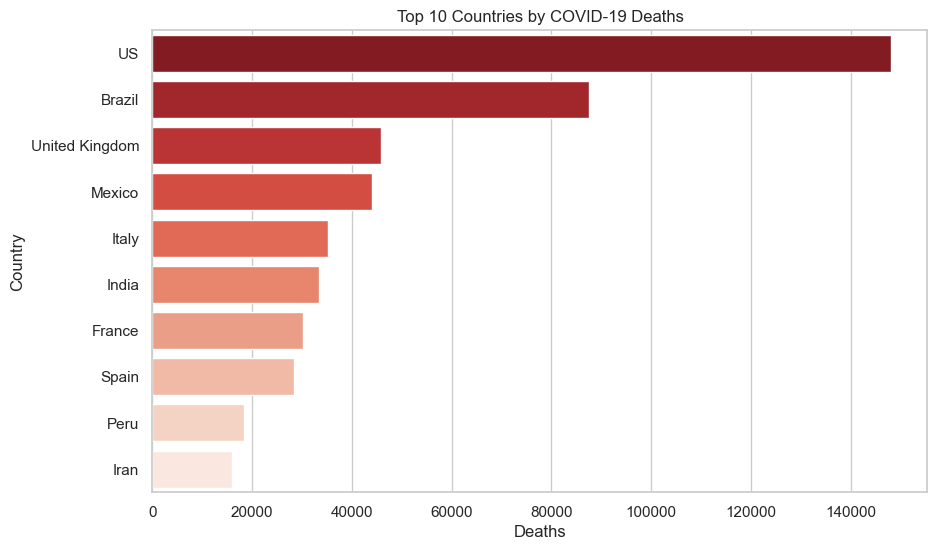

In [30]:
top_deaths = data.sort_values(by='Deaths', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Deaths', y='Country/Region', hue='Country/Region', data=top_deaths, palette='Reds_r', legend=False)
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country')
plt.show()

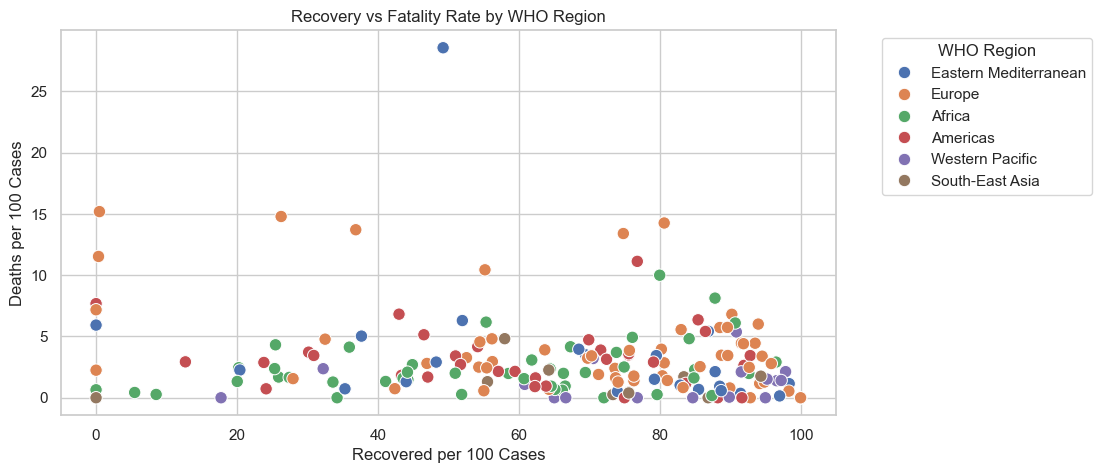

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Recovered / 100 Cases', y='Deaths / 100 Cases', hue='WHO Region', data=data, s=80)
plt.title('Recovery vs Fatality Rate by WHO Region')
plt.xlabel('Recovered per 100 Cases')
plt.ylabel('Deaths per 100 Cases')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

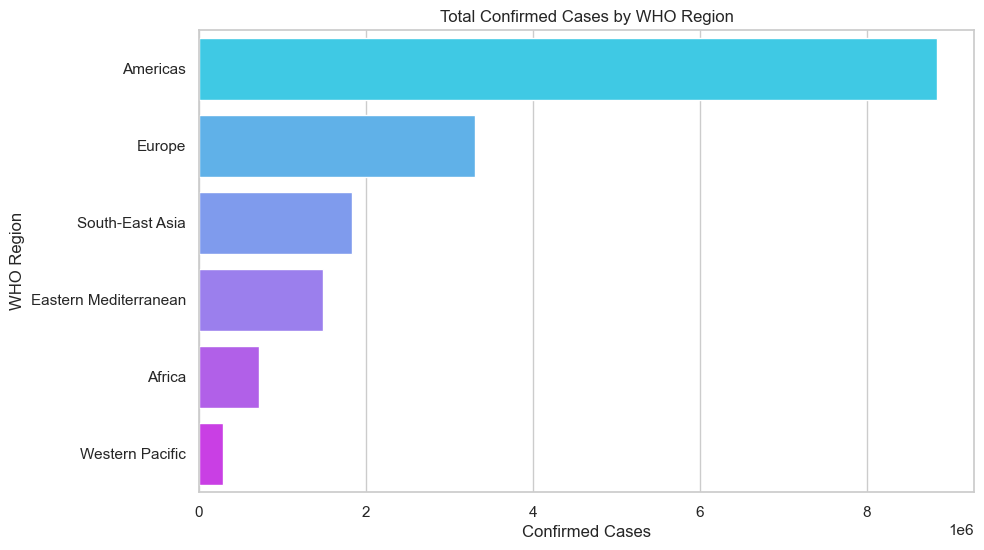

In [32]:
region_summary = data.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y='WHO Region', hue='WHO Region', data=region_summary.sort_values('Confirmed', ascending=False), palette='cool', legend=False)
plt.title('Total Confirmed Cases by WHO Region')
plt.xlabel('Confirmed Cases')
plt.ylabel('WHO Region')
plt.show()

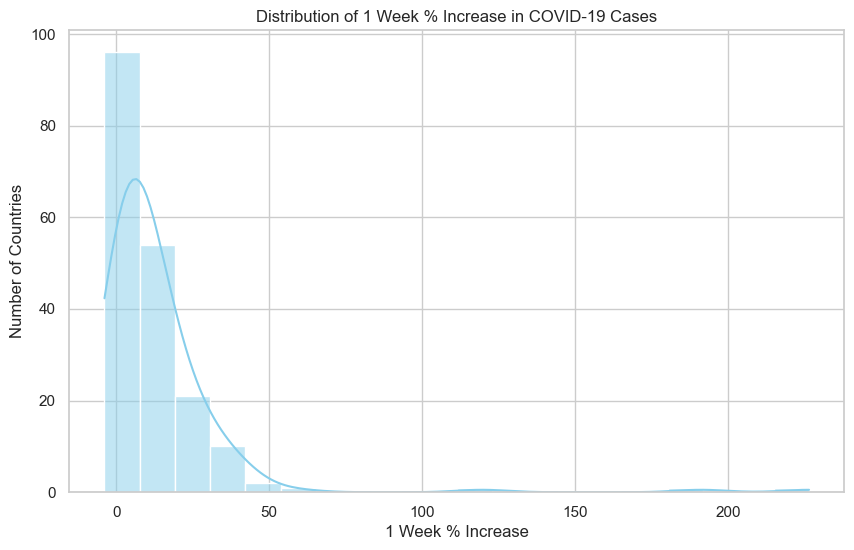

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data['1 week % increase'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of 1 Week % Increase in COVID-19 Cases')
plt.xlabel('1 Week % Increase')
plt.ylabel('Number of Countries')
plt.show()

In [34]:
print('''\n--- KEY INSIGHTS ---
1️⃣ Countries like the US, India, and Brazil report the highest total confirmed cases.
2️⃣ European and American regions have higher death counts overall.
3️⃣ Recovery rates vary by region — some regions show >80% recovery.
4️⃣ Weekly case growth helps identify current hotspots.
5️⃣ WHO Region analysis shows regional spread patterns.
\nThis notebook can be expanded with time-series data or vaccination analysis for deeper insights.''')


--- KEY INSIGHTS ---
1️⃣ Countries like the US, India, and Brazil report the highest total confirmed cases.
2️⃣ European and American regions have higher death counts overall.
3️⃣ Recovery rates vary by region — some regions show >80% recovery.
4️⃣ Weekly case growth helps identify current hotspots.
5️⃣ WHO Region analysis shows regional spread patterns.

This notebook can be expanded with time-series data or vaccination analysis for deeper insights.
